In [4]:
%reset -f

In [5]:
import numpy as np
import pandas as pd
import math as m
from scipy import special as sp
import matplotlib.pyplot as plt

In [6]:
def N(mu,sigma,n): return np.random.normal(mu,sigma,n)

In [7]:
n=1000
data = {
    'x0': N(0,1,n),
    'x1': N(0,1,n),
    'x2': N(0,1,n),
    'x3': N(0,1,n),
    'x4': N(0,1,n),
    'x5': N(0,1,n),
    'x6': N(0,1,n),
    'x7': N(0,1,n),
    'x8': N(0,1,n),
    'x9': N(0,1,n)
}

df = pd.DataFrame(data, columns=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9']) 
# correlation matrix
df.corr()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
x0,1.000000,-0.005743,0.011545,0.042309,-0.008568,-0.044097,-0.040039,-0.001604,-0.013912,0.014172
x1,-0.005743,1.000000,0.015599,-0.012323,-0.008805,0.019395,-0.008665,-0.034136,0.031573,-0.022272
x2,0.011545,0.015599,1.000000,-0.055595,0.000509,0.065604,-0.041778,-0.047645,-0.045693,0.011572
x3,0.042309,-0.012323,-0.055595,1.000000,0.007781,-0.040972,-0.039181,0.015256,-0.031987,0.078178
x4,-0.008568,-0.008805,0.000509,0.007781,1.000000,-0.002973,-0.072345,0.000450,0.047743,0.017598
x5,-0.044097,0.019395,0.065604,-0.040972,-0.002973,1.000000,0.053525,0.022243,-0.000599,-0.034421
x6,-0.040039,-0.008665,-0.041778,-0.039181,-0.072345,0.053525,1.000000,0.019633,-0.017098,-0.020581
x7,-0.001604,-0.034136,-0.047645,0.015256,0.000450,0.022243,0.019633,1.000000,0.005199,-0.015729
x8,-0.013912,0.031573,-0.045693,-0.031987,0.047743,-0.000599,-0.017098,0.005199,1.000000,-0.031705
x9,0.014172,-0.022272,0.011572,0.078178,0.017598,-0.034421,-0.020581,-0.015729,-0.031705,1.000000


In [107]:
st.kstest(dat, st.norm.cdf(x,0.9))

In [107]:
x = np.array(data['x3'])
e = np.array(data['x5']) # choose the minimum correlation from above

<function matplotlib.pyplot.show(close=None, block=None)>

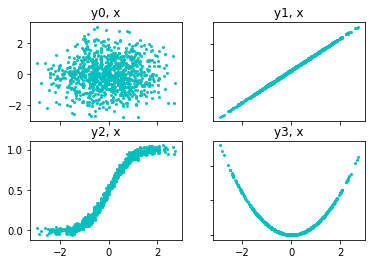

In [110]:
Ce = 0.03

y0 = e
m1=(.5+ .5*sp.erf(x))
y1 = (1.503 * x) + Ce*e
y2 = m1 + Ce*e
y3 = (1.503 * (x**2)) + Ce*e

kwargs={'lw':0.01}
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(x, y0, c ='c', marker='.' ,**kwargs) 
axs[0, 0].set_title('y0, x')
axs[0, 1].scatter(x, y1, c ='c', marker='.' ,**kwargs) 
axs[0, 1].set_title('y1, x')
axs[1, 0].scatter(x, y2, c ='c', marker='.' ,**kwargs) 
axs[1, 0].set_title('y2, x')
axs[1, 1].scatter(x, y3, c ='c', marker='.' ,**kwargs) 
axs[1, 1].set_title('y3, x')

#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
#fillstyles = ('full', 'left', 'right', 'bottom', 'top', 'none')

#for ax in axs.flat:    ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:    ax.label_outer()
plt.show

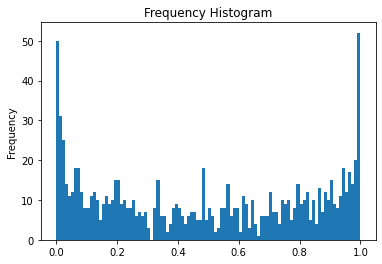

In [112]:
a = m1
b = y2

z = a/b
plt.hist(m1, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [95]:
from IPython.display import SVG, display
SVG("sgm.svg")

# Fitter

In [1]:
%reset -f

In [2]:
from fitter import Fitter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
sns.set_theme()

dat = open('310510_sum.txt', 'r')
dat = dat.read().replace(',','.')
dat = [float(x) for x in dat.split(' ')]
    # given your data is seperated with space, as you give it
dat.sort()

,sumsquare_error,aic,bic,kl_div
alpha,0.005247,1445.609201,-2371.999607,inf
burr,0.005522,1451.205113,-2355.145932,inf
lognorm,0.006695,1442.349419,-2317.404683,inf
rayleigh,0.016285,1762.926582,-2123.713896,inf


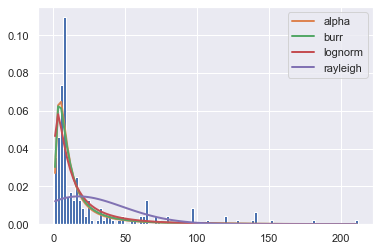

In [3]:
f = Fitter(dat,distributions=['alpha','rayleigh',"burr","lognorm",'gamma',''])
f.fit()
f.summary()

In [7]:
rslt = f.get_best(method = 'sumsquare_error')
pd.DataFrame.from_dict(rslt, orient='index')

,a,loc,scale
alpha,1.135187,-4.662002,18.939404


In [10]:
x = np.linspace(0,100,1000_000)
p = st.kstest(dat, st.rayleigh.cdf(x, rslt['alpha']['a']))[1]
if p < .05: print('H₀ is rejected, proposed distribution denied')
else: print('H₀ can not be rejected')

H₀ is rejected
